In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [62]:
print("\nClass distribution:\n", df['Species'].value_counts())


Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [63]:
df.shape

(150, 6)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [65]:
print("Null Values: ", df.isnull().sum())
print("Duplicate Values: ", df.duplicated().sum())

Null Values:  Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Duplicate Values:  0


# Explore and Understand Data (EEDA)

In [66]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [67]:
df.drop(columns="Id", axis=1, inplace=True)

In [68]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

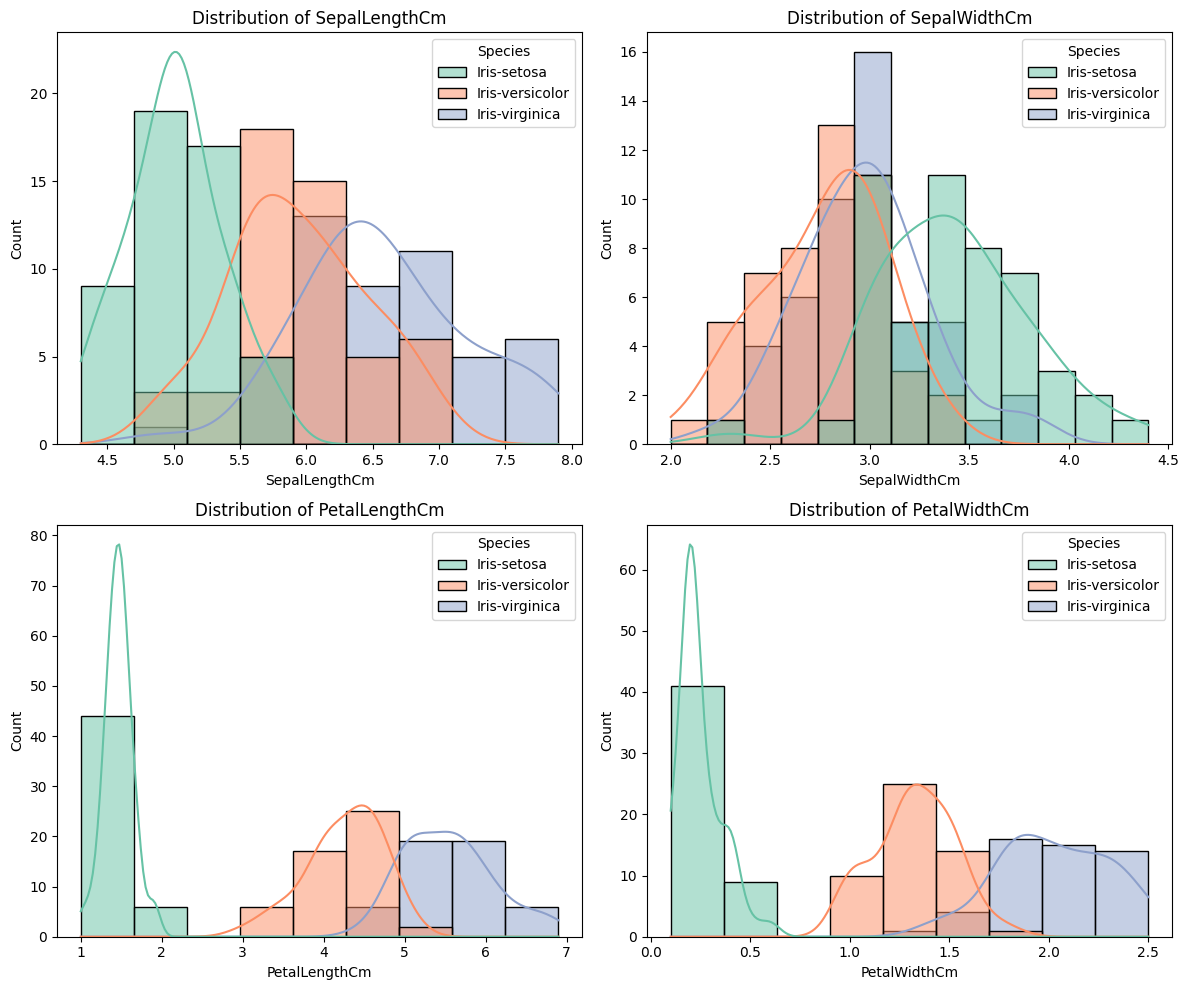

In [70]:
plt.figure(figsize=(12, 10))

for i, features in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=features, hue="Species", kde=True, palette="Set2")
    plt.title(f"Distribution of {features}")
    
plt.tight_layout()
plt.show()

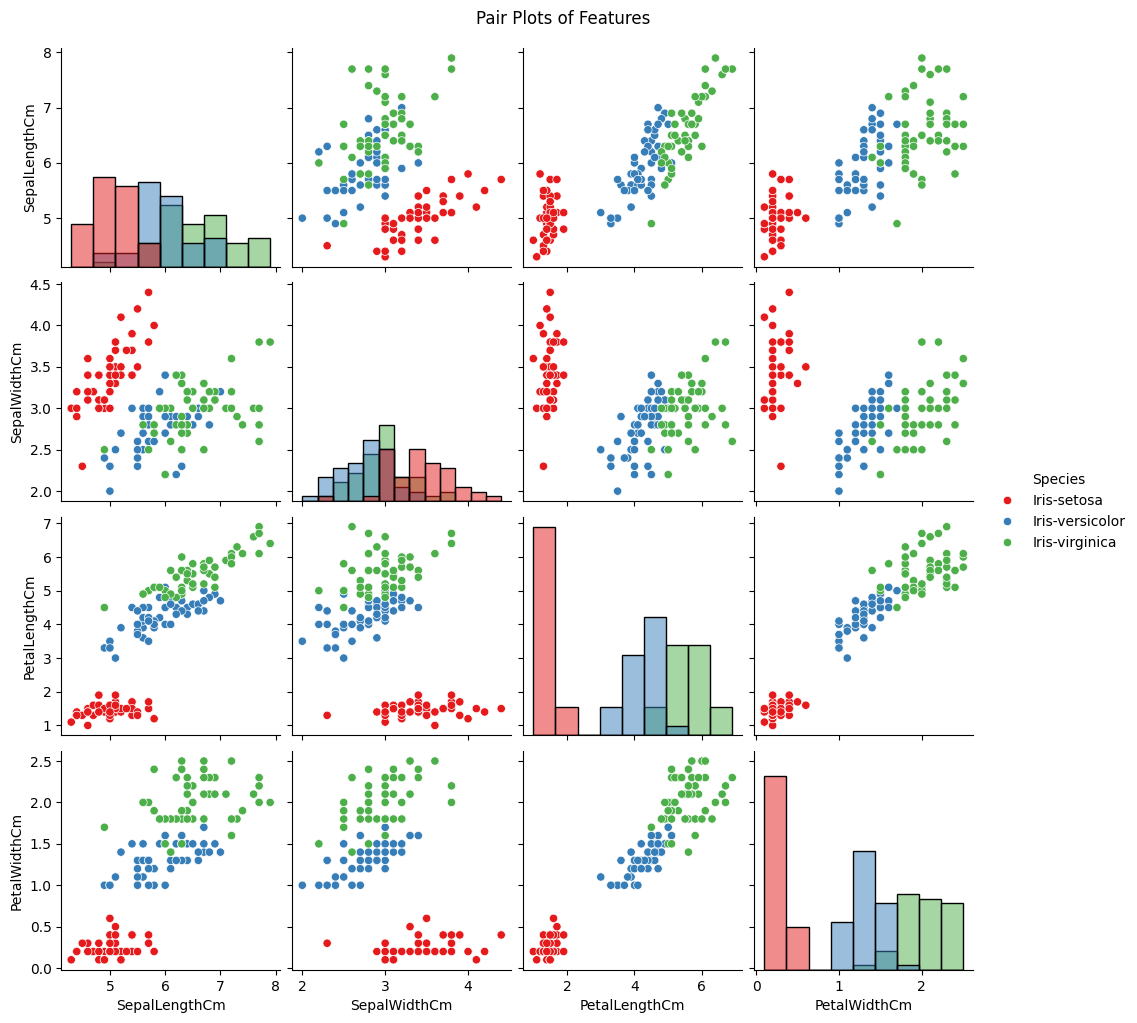

In [71]:
sns.pairplot(df, hue="Species", diag_kind="hist", palette="Set1")
plt.suptitle("Pair Plots of Features", y=1.02)
plt.show()

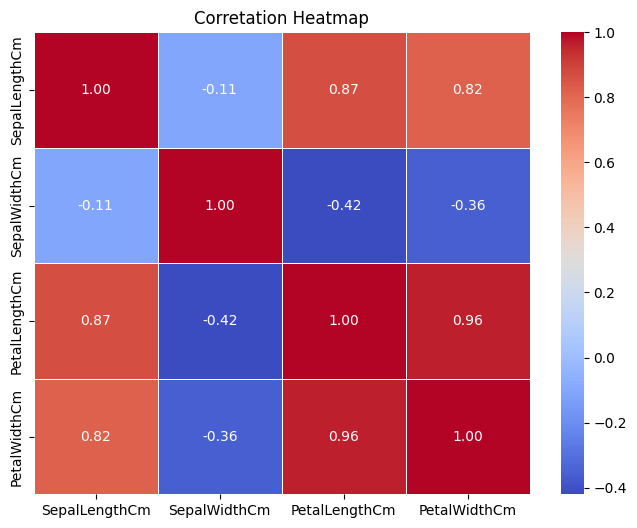

In [72]:
plt.figure(figsize=(8, 6))
corr = df.drop("Species", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corretation Heatmap")
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [74]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
X = df.drop("Species", axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

In [78]:
models = {
    "LogReg": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [79]:
for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean():.3f}")

LogReg: 0.958
KNN: 0.933
SVC: 0.950
DecisionTree: 0.958
RandomForest: 0.942
GaussianNB: 0.942
GradientBoosting: 0.950


In [83]:
param_grids = {
    "LogReg": {
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear', 'lbfgs']
    },
    "DecisionTree": {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 10, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': [None, 'sqrt', 'log2']
    }
}

In [84]:
best_models = {}
for name in param_grids.keys():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', models[name])])
    grid = GridSearchCV(pipe, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"\nBest {name} params: {grid.best_params_}")
    print(f"Best CV score: {grid.best_score_:.3f}")


Best LogReg params: {'clf__C': 1, 'clf__solver': 'lbfgs'}
Best CV score: 0.958

Best DecisionTree params: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Best CV score: 0.958


In [85]:
test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_results[name] = acc
    print(f"\n{name} Test Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Metrix:\n", confusion_matrix(y_test, y_pred))


LogReg Test Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Metrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

DecisionTree Test Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Metrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [86]:
# Pick the best model
best_model_name = max(test_results, key=test_results.get)
final_model = best_models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with accuracy {test_results[best_model_name]:.3f}")


✅ Best Model: LogReg with accuracy 1.000


In [87]:
import pickle
with open("iris_best_model.pkl", "wb") as f:
    pickle.dump(final_model, f)